<h1 align="center"><strong>Transformada de Fourier en 1D</strong></h1>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML

**¿Qué es la Transformada de Fourier?**

Es una técnica que permite pasar de la señal original a un espectro(dominio de la frecuencia) que nos dice que frecuencias son las que tiene la señal de entrada y cuanto tiene de cada una de esas frecuencias.

**¿Para qué sirve la Transformada de Fourier?**

La transformada de Fourier permite hacer una traducción del dominio original(por ejemplo una señal en el tiempo), la cual la vamos a transformar o traducir al dominio de la frecuencia.

**¿Qué se hace para procesar señales en el dominio de Fourier?**

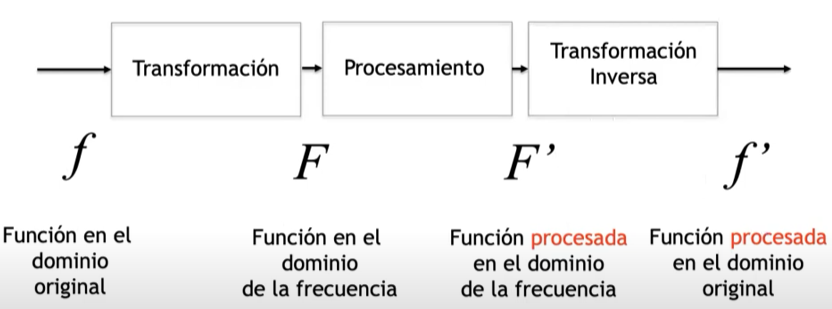

In [2]:
Image(filename = "../Cap04_Sistemas_Lineales/imagenes/TF.PNG", width=1000, height=1000)

La T.F. tiene la siguiente forma:
$$ f(t) = \int_{-\infty}^{+\infty} F(w) e^{-j 2\pi w t}dw \text{ ; Señal en el dominio original  }$$ 

$$ F(w) = \int_{-\infty}^{+\infty} f(t) e^{-j 2\pi w t}dt \text{ ; Señal en el dominio de frecuencias  }$$

**¿Cómo se puede entender esta fórmula?**
$$\text{Las funciones base en el dominio de Fourier son :} e^{-j 2\pi w t} \text{el cual representa la suma de un coseno en la 
parte real y un seno en la parte imaginaria; esta funcion tiene un argumento de}\ {2\pi w t}$$ 

$$\text{Entre más grande }{ w  } \text{ van a ser coseno y senos de mayor frecuencia, si las funciones f(t) y la función base tienen frecuencias distintas la integral me va dar cero, en cambio si la funcion f(t) tiene una frecuencia que oscila a la misma frecuencia del coseno de la funcion base a la hora de multiplicar la integral va existir lo cual indica que esa señal va tener un componente en dicha frecuencia.} $$


Nota: Para la función pulso, entre más grande es el ancho del pulso, F(w) piensa a oscilar más rápida en el dominio de la frecuencia

# Ejemplo simple con FFT

Referencia:

* [Real Python (FFT)](https://realpython.com/python-scipy-fft/)

## Generacion de onda sinusoidal

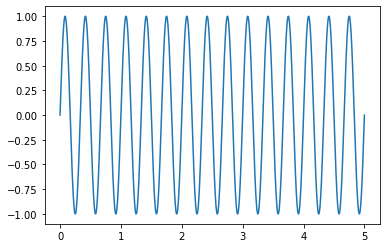

In [3]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(3, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

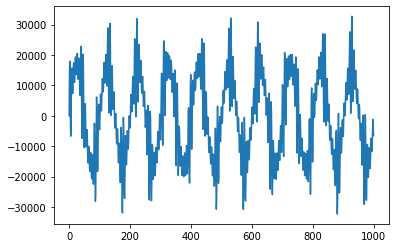

In [4]:
_, nice_tone   = generate_sine_wave( 440, SAMPLE_RATE, DURATION)
_, noise_tone1 = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
_, noise_tone2 = generate_sine_wave(5000, SAMPLE_RATE, DURATION)
_, noise_tone3 = generate_sine_wave(6000, SAMPLE_RATE, DURATION)
_, noise_tone4 = generate_sine_wave(7000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone1 * 0.1 + noise_tone2 * 0.2 + noise_tone3 * 0.3 + noise_tone4 * 0.4

mixed_tone = nice_tone + noise_tone

y_original = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(y_original[:1000])
plt.show()

## Audio + Ruido

In [5]:
from scipy.io import wavfile

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
wavfile.write("../Cap04_Sistemas_Lineales/imagenes/original.wav", SAMPLE_RATE, y_original)

In [6]:
import IPython
IPython.display.Audio('../Cap04_Sistemas_Lineales/imagenes/original.wav') # This is required on Google Colab due to compatibility issues

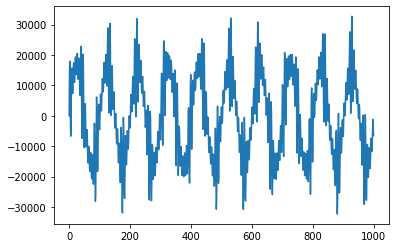

In [7]:
# How to read a wav file
SAMPLE_RATE, y_original = wavfile.read('../Cap04_Sistemas_Lineales/imagenes/original.wav')
plt.plot(y_original[:1000])
plt.show()

## Transformada de Fourier

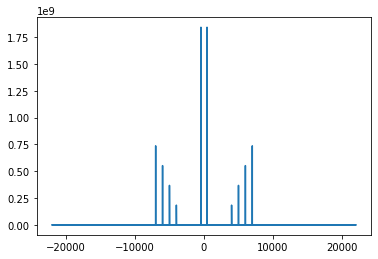

In [8]:
from scipy.fft import fft, fftfreq

# Number of samples in y_original
N = len(y_original) # = SAMPLE_RATE * DURATION

yf = fft(y_original)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

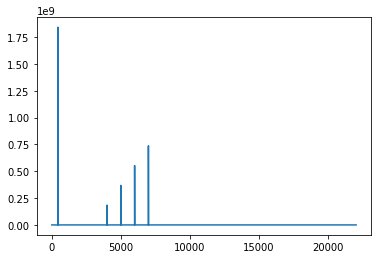

In [9]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(y_original)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

## Filtrado

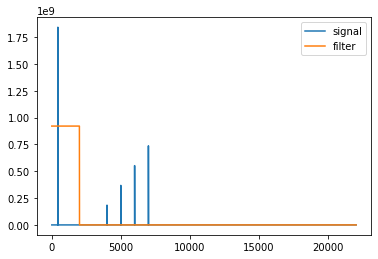

In [10]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 2000)

yf_abs = np.abs(yf)

plt.plot(xf,yf_abs)

hf = np.ones((len(xf),))
hf[target_idx:] = 0
plt.plot(xf, hf*np.max(yf_abs)/2)
plt.legend(['signal','filter'])
plt.show()

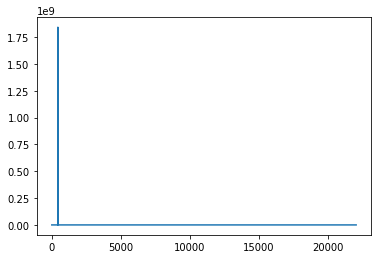

In [11]:
# Filtering
yff = np.multiply(yf,hf)
plt.plot(xf, np.abs(yff))
plt.show()

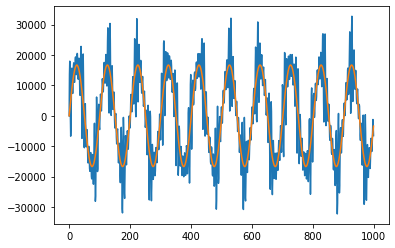

In [12]:
from scipy.fft import irfft

y_filtered_real = irfft(yff).real
y_filtered      = y_filtered_real.astype(np.int16)

plt.plot(y_original[:1000])
plt.plot(y_filtered[:1000])
plt.show()

In [13]:
# Remember SAMPLE_RATE = 44100 Hz is our playback rate
wavfile.write("../Cap04_Sistemas_Lineales/imagenes/filtered.wav", SAMPLE_RATE, y_filtered)

In [14]:
IPython.display.Audio('../Cap04_Sistemas_Lineales/imagenes/filtered.wav') # This is required on Google Colab due to compatibility issues

In [15]:
IPython.display.Audio('../Cap04_Sistemas_Lineales/imagenes/original.wav') # This is required on Google Colab due to compatibility issues

# Ejemplos avanzados
* From [Audio Processing (colab)](https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb#scrollTo=zWgVpXThNqVD)

## Ejemplo 1: onda sinusoidal

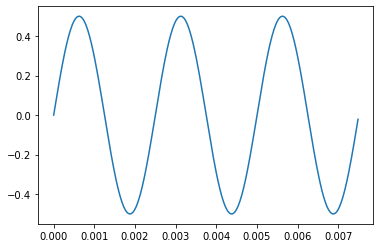

Writing sound.wav


In [18]:
# This file shows how to generate a sine wave using the ThinkDSP library.
import os 
os.chdir(r"C:\Users\titos\Github\Procesamiento Imagenes\Cap04_Sistemas_Lineales\ThinkDSP\code")
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

# Generate wave
sin = thinkdsp.SinSignal(freq=400, amp=0.5) # Where freq is the frequency and amp is the amplitude of the sine wave
wave = sin.make_wave(duration=2, start=0, framerate=44100) # Turn the sin wave into an audio wave

# Plot wave
period = sin.period
segment = wave.segment(start=0, duration=period*3)
segment.plot()
pyplot.show()

# Play wave
wave.play()
IPython.display.Audio('sound.wav') # This is required on Google Colab due to compatibility issues

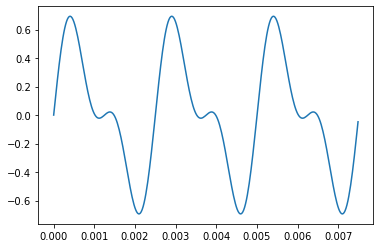

Writing sound.wav


In [19]:
# Generate wave
sin1 = thinkdsp.SinSignal(freq=400, amp=0.5)
sin2 = thinkdsp.SinSignal(freq=800, amp=0.3)
mix = sin1 + sin2 # Notice here how 2 waves can be added together
wave = mix.make_wave(duration=2, start=0, framerate=44100)

# Plot wave
period = mix.period
segment = wave.segment(start=0, duration=period*3)
segment.plot()
pyplot.show()

# Play wave
wave.play()
IPython.display.Audio('sound.wav')

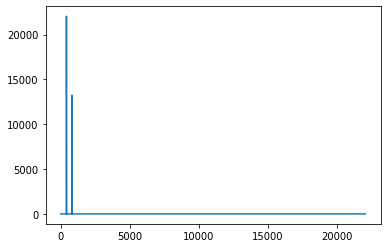

Writing sound.wav


In [20]:
# Generate wave
sin1 = thinkdsp.SinSignal(freq=400, amp=0.5)
sin2 = thinkdsp.SinSignal(freq=800, amp=0.3)
mix = sin1 + sin2 # Notice here how 2 waves can be added together
wave = mix.make_wave(duration=2, start=0, framerate=44100)

# Plot spectrum of wave
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play wave
wave.play()
IPython.display.Audio('sound.wav')

## Ejemplo 2: Archivo de audio

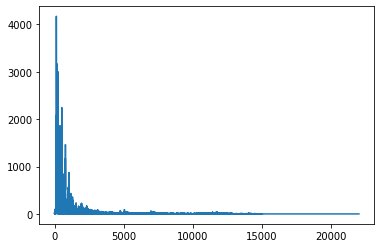

Writing sound.wav


In [23]:
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

# Read in audio file
# FIXME - will this work for non wav files
wave = thinkdsp.read_wave('../../AudioProcessingInPythonWorkshop/test.wav')

# Grab first 10 seconds of audio (you can ignore me)
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play audio file
wave.play()
IPython.display.Audio('sound.wav')

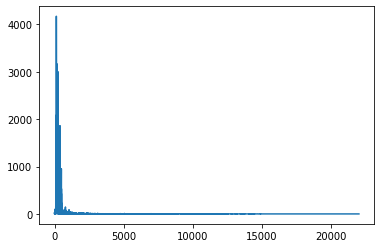

Writing sound.wav


In [25]:
import matplotlib.pyplot as pyplot
import IPython

# Read in audio file
wave = thinkdsp.read_wave('../../AudioProcessingInPythonWorkshop/test.wav')

# Grab first 10 seconds of audio (you can ignore me)
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]


# Filter
spectrum = wave.make_spectrum()
spectrum.low_pass(cutoff = 500, factor = .1)
#spectrum.high_pass(cutoff = 1500, factor = .1) # FIXME - Change back to low pass filter
filteredWave = spectrum.make_wave()

# Plot spectrum of audio file
spectrum = filteredWave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play filtered audio file
filteredWave.play()
IPython.display.Audio('sound.wav')

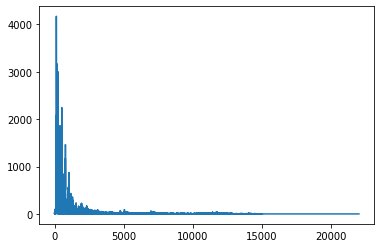

Writing sound.wav


C:\Users\titos\Github\Procesamiento Imagenes\Cap04_Sistemas_Lineales\ThinkDSP\code\thinkdsp.py:1173: UserWarning: Warning: normalizing before quantizing.
  warnings.warn("Warning: normalizing before quantizing.")


In [26]:
# Read in audio file
wave = thinkdsp.read_wave('../../AudioProcessingInPythonWorkshop/test.wav')

# Grab first 10 seconds of audio (you can ignore me)
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]


# Filter
spectrum = wave.make_spectrum()
spectrum.high_pass(cutoff = 1500, factor = .1) # FIXME - Change back to low pass filter
filteredWave = spectrum.make_wave()

# Add filtered wave to original wave
filteredWave.ys *= 10 # Increase the filtered wave's power so the treble effect is more noticable
combinedWave = filteredWave + wave

# Plot spectrum of audio file
spectrum = wave.make_spectrum()
spectrum.plot()
pyplot.show()

# Play filtered audio file
combinedWave.play()
IPython.display.Audio('sound.wav')